In [1]:
import pandas as pd

In [4]:
hpf_df = pd.read_csv("hpf_component_with_fdcid.csv", index_col="fdc_id")
hpf_df

,NDB_No,fsdo,fs,csdo,gtin_upc
fdc_id,,,,,
1880619,45162472,False,True,False,809424900756
1864950,45085807,False,True,False,185255000231
1942022,45351070,False,False,True,846107018070
2087698,45248412,False,False,True,29000017986
1876804,45152103,False,True,False,66909100548
...,...,...,...,...,...
1879662,45160079,False,False,True,891056000584
2031810,45097852,False,False,True,90163001815
2024307,45063743,True,False,False,32063200011


In [6]:
nutrient_matrix_data_p = r"../../data/"

nutrient_matrix_nutriscore_p = nutrient_matrix_data_p + "usda_2022_nutri_score.csv.gz"

In [9]:
nutri_score_df = pd.read_csv(nutrient_matrix_nutriscore_p, index_col="fdc_id")
nutri_score_df

,nutri_score,nutri_score_label
fdc_id,,
344604,0.0,B
344605,0.0,B
344606,-5.0,A
344607,-5.0,A
344608,0.0,B
...,...,...
2340755,-4.0,A
2340756,-4.0,A
2340757,-4.0,A


In [46]:
nutri_hpf_df = nutri_score_df.merge(hpf_df, left_index = True, right_index = True)
nutri_hpf_df['number_of_records'] = 1
nutri_hpf_df

,nutri_score,nutri_score_label,NDB_No,fsdo,fs,csdo,gtin_upc,number_of_records
fdc_id,,,,,,,,
344646,8.0,C,45127070,False,True,False,38000162367,1
344922,-2.0,A,45127725,False,True,False,84059100010,1
345313,3.0,C,45128624,False,True,False,10030100800337,1
345315,3.0,C,45128628,False,True,False,10030100800467,1
345321,3.0,C,45128640,False,True,False,10030100800344,1
...,...,...,...,...,...,...,...,...
2124836,14.0,D,45363127,False,True,False,28000302658,1
2183011,7.0,C,45090367,False,True,False,4710172030014,1
2183011,7.0,C,45090367,False,False,True,4710172030014,1


In [57]:
pd.pivot_table(data = nutri_hpf_df, values='number_of_records', index=['nutri_score_label'], 
               columns=['fsdo', 'fs', 'csdo'], aggfunc = 'sum' )

fsdo              False        True 
fs                False  True  False
csdo              True   False False
nutri_score_label                   
A                   317   2897   163
B                   617   3370   421
C                  4691  11132  3548
D                  6775   9254  5823
E                  3879   3894  2223

<Axes: >

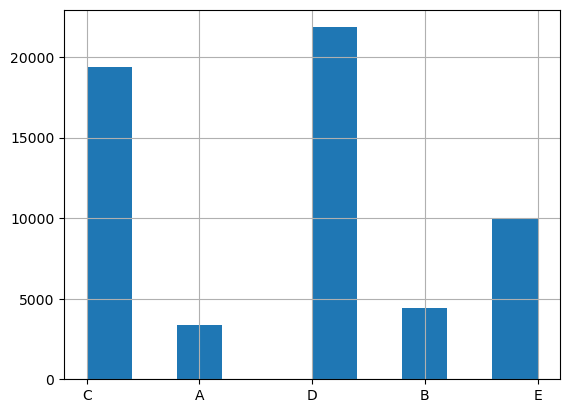

In [43]:
nutri_hpf_df['nutri_score_label'].hist()

Something is wrong with profs query 
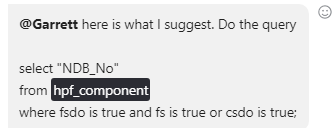

In [41]:
nutri_hpf_df[(nutri_hpf_df["fsdo"] == True)].sum()

nutri_score                                                   158022.0
nutri_score_label    AACDDDCCDCCCDCDDDDDCCCDDBCCCCDBCDDECBDCDBCCCDC...
NDB_No                                                    550088879598
fsdo                                                             12178
fs                                                                   0
csdo                                                                 0
gtin_upc                                              4307050252419998
dtype: object

In [38]:
nutri_hpf_df[(nutri_hpf_df["fsdo"] == True) & ((nutri_hpf_df["fs"] == True) | (nutri_hpf_df["csdo"] == True))]

,nutri_score,nutri_score_label,NDB_No,fsdo,fs,csdo,gtin_upc
fdc_id,,,,,,,


In [39]:
nutri_hpf_df.query('fsdo == True & csdo == True')

,nutri_score,nutri_score_label,NDB_No,fsdo,fs,csdo,gtin_upc
fdc_id,,,,,,,


In [30]:
(nutri_hpf_df["fs"] == True).sum()

30547